### Installing important libraries
 * numpy
 * matplotlib
 * ipywidgets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

## Defining the grid


In [2]:
# Defining the grid
x = np.linspace(-5, 5, 23)
y = np.linspace(-5, 5, 23)
X, Y = np.meshgrid(x, y)



## Creating charges

Specifing the magnitudes of the charges `q1` and `q2`

And, there positions in the grid as:
Charge | x-coord | y-coord
---|---|---
q1 | x1 | y1 
q2 | x2 | y2 


In [3]:
# Creating charges
q1 = 3         # Charge magnitude 1
q2 = -3        # Charge magnitude 2
x1, y1 = -2, 0  # Charge 1 position
x2, y2 = 2, 0   # Charge 2 position




## Calculating the electric field for every point on the grid 
Columb's constant `k` = 8.987 x $10^{9}$

To calculate the distance for every point (X,Y) on the grid with respect charge 1 (`q1`) `r1`= $\sqrt[]{(X-x_1)^2 + (Y-y_1)^2}$

Similarly, to calculate the distance for every point (X,Y) on the grid with respect charge 2 (`q2`) `r2`= $\sqrt[]{(X-x_2)^2 + (Y-y_2)^2}$

Now,

To calculate the electric field for every point (X,Y) on the grid along *_x-axis_* for *_charge 1_* (`q1`) `Ex1` = $\frac{kq1(X-x_1)}{r_1^3}$

...calculate the electric field for every point (X,Y) on the grid along *_y-axis_* for *_charge 1_* (`q1`) `Ey1` = $\frac{kq1(Y-y_1)}{r_1^3}$

...calculate the electric field for every point (X,Y) on the grid along *_x-axis_* for *_charge 2_* (`q2`) `Ex2` = $\frac{kq2(X-x_2)}{r_2^3}$

...calculate the electric field for every point (X,Y) on the grid along *_y-axis_* for *_charge 2_* (`q2`) `Ey2` = $\frac{kq2(Y-y_2)}{r_2^3}$


At the last Adding all the electric fields for x and y as `Ex` and `Ey`:

`Ex` = `Ex1` + `Ex2` 

`Ey` = `Ey1` + `Ey2`



In [4]:
# Calculating the electric field at each point on the grid
def calculate_field(q1, q2, x1, y1, x2, y2):
    k = 8.987 * 10**9  # Coulomb's constant
    r1 = np.sqrt((X - x1)**2 + (Y - y1)**2)  # Distance from charge 1 for the point (X,Y) on the grid 
    r2 = np.sqrt((X - x2)**2 + (Y - y2)**2)  # Distance from charge 2 for the point (X,Y) on the grid

    Ex1 = k * q1 * (X - x1) / r1**3    # Electric field component from charge 1 along x-axis for every point on the grid
    Ey1 = k * q1 * (Y - y1) / r1**3    # Electric field component from charge 1 along y-axis for every point on the grid
    Ex2 = k * q2 * (X - x2) / r2**3    # Electric field component from charge 2 along x-axis for every point on the grid 
    Ey2 = k * q2 * (Y - y2) / r2**3    # Electric field component from charge 2 along y-axis for every point on the grid 

    Ex = Ex1 + Ex2                     # Total electric field component along x-axis
    Ey = Ey1 + Ey2                     # Total electric field component along y-axis

    return Ex, Ey



## Making an interactive sliders and input fields

In [5]:
# Create interactive sliders and input fields
q1_slider = widgets.FloatSlider(value=q1, min=-5, max=5, step=0.1, description='Charge 1 (q1):')
q2_slider = widgets.FloatSlider(value=q2, min=-5, max=5, step=0.1, description='Charge 2 (q2):')
x1_input = widgets.FloatText(value=x1, description='X1 position:')
y1_input = widgets.FloatText(value=y1, description='Y1 position:')
x2_input = widgets.FloatText(value=x2, description='X2 position:')
y2_input = widgets.FloatText(value=y2, description='Y2 position:')

# Update the plot when sliders or input fields change
def update_plot(change):
    q1 = q1_slider.value
    q2 = q2_slider.value
    x1 = x1_input.value
    y1 = y1_input.value
    x2 = x2_input.value
    y2 = y2_input.value
    
    Ex, Ey = calculate_field(q1, q2, x1, y1, x2, y2)
    Ex_norm = Ex / np.sqrt(Ex**2 + Ey**2)
    Ey_norm = Ey / np.sqrt(Ex**2 + Ey**2)
    
    plt.quiver(X, Y, Ex_norm, Ey_norm, scale=20)
    plt.title('Electric Field Lines')
    plt.draw()

# Register the update function with slider and input field events
q1_slider.observe(update_plot, 'value')
q2_slider.observe(update_plot, 'value')
x1_input.observe(update_plot, 'value')
y1_input.observe(update_plot, 'value')
x2_input.observe(update_plot, 'value')
y2_input.observe(update_plot, 'value')


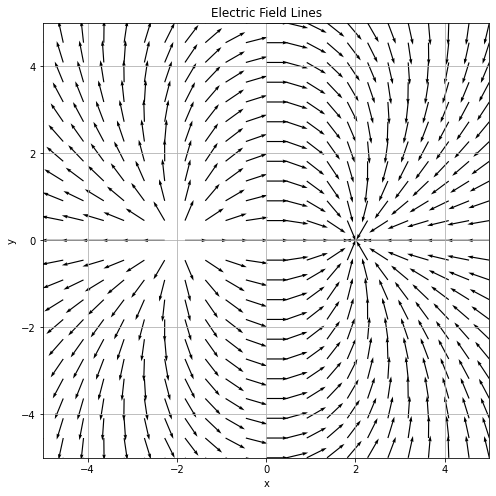

In [6]:
# Create a layout for sliders and input fields
layout = widgets.Layout(display='flex', flex_flow='row', justify_content='space-between', width='400px')

# Display the sliders and input fields
display(widgets.VBox([q1_slider, q2_slider, x1_input, y1_input, x2_input, y2_input], layout=layout))

# Create the initial plot
plt.figure(figsize=(8, 8))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Electric Field Lines')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)

# Call update_plot() to initialize the plot
update_plot(None)

# Show the plot
plt.show()